In [6]:
# plots raman data and highlights peaks for graphene
# for graphene MUST have the range between 1000 and 3000

In [7]:
# dependencies
import matplotlib.pyplot as plt
import os
import numpy as np

from scipy.signal import medfilt

In [8]:
data_folder_name = 'Raman 25-12-17 wafer-2'
data_folder_path = 'data'

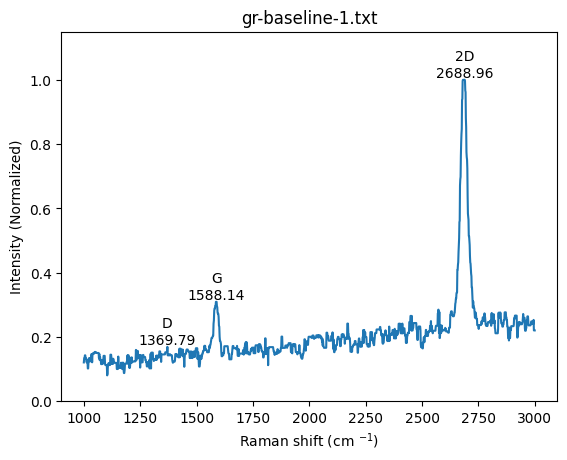

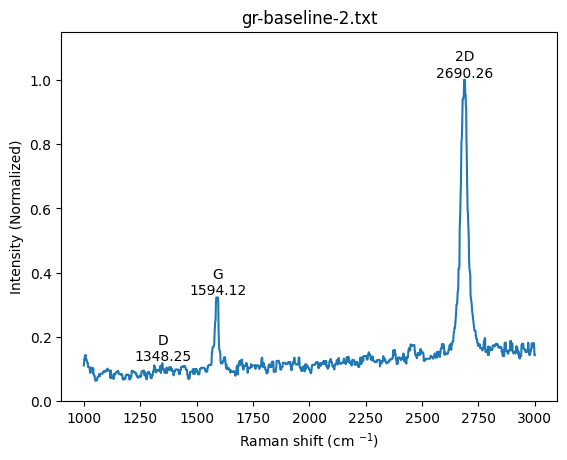

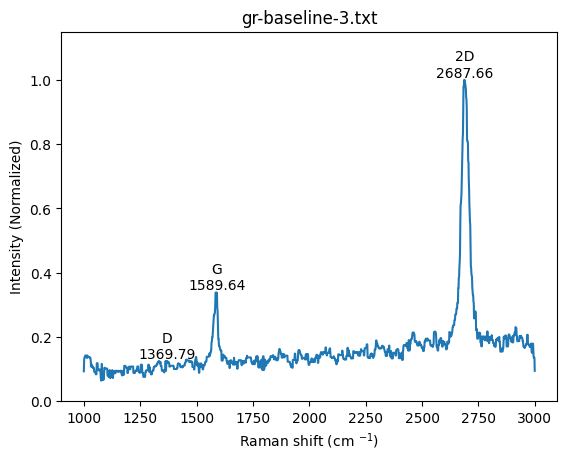

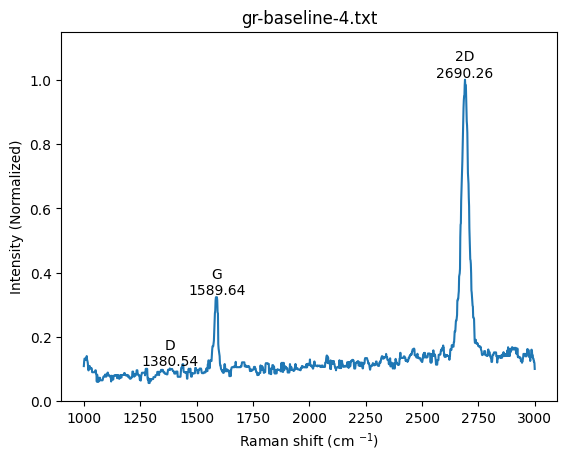

ERROR FINDING GRAPHENE PEAKS, TRYING TO DETECT SI PEAK
ERROR FINDING GRAPHENE PEAKS, TRYING TO DETECT SI PEAK
ERROR FINDING GRAPHENE PEAKS, TRYING TO DETECT SI PEAK


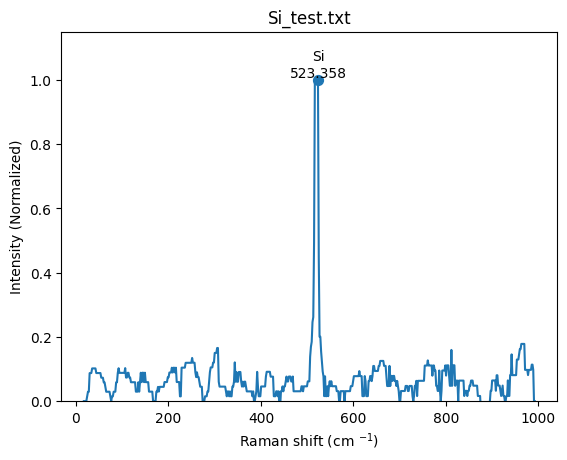

In [9]:
for filename in os.listdir(os.path.join(data_folder_path, data_folder_name)):
    data = np.loadtxt(os.path.join(os.path.join(data_folder_path, data_folder_name), filename))
    x = data[:, 0]
    y = data[:, 1]

    y_filtered = medfilt(y, kernel_size=9)
    y_filtered = y_filtered / max(y_filtered)
    peaks_xy = []
    graphene_flag = False # for labeling if the raman plot is for graphene or Si

    # D peak ~1350
    # G peak ~1580
    # 2D peak ~2700
    for peak_value in [1350, 1580, 2700]:
        try:
            mask = (x >= peak_value - 70) & (x <= peak_value + 70)
            x_subset = x[mask]
            y_subset = y_filtered[mask]
            max_idx = np.argmax(y_subset)
            x_at_max_y = x_subset[max_idx]
            peaks_xy.append((x_at_max_y, np.max(y_subset)))
            graphene_flag = True
        except:
            print('ERROR FINDING GRAPHENE PEAKS, TRYING TO DETECT SI PEAK')
            try:
                mask = (x >= 520 - 10) & (x <= 520 + 10)
                x_subset = x[mask]
                y_subset = y_filtered[mask]
                max_idx = np.argmax(y_subset)
                x_at_max_y = x_subset[max_idx]
                peaks_xy.append((x_at_max_y, np.max(y_subset)))
            except:
                print('COULD NOT FIND ANY PEAKS')

    # plot and make pretty
    plt.plot(x, y_filtered)
    plt.xlabel(r'Raman shift (cm $^{-1}$)')
    plt.ylabel('Intensity (Normalized)')
    plt.ylim(0,1.15)
    plt.title(filename)

    if graphene_flag:
        peak_names =['D', 'G', '2D']
        # plotting peaks
        for i, (x_peak, y_peak) in enumerate(peaks_xy):
            plt.scatter(x_peak,x_peak, marker='o', s=50)
            plt.text(x_peak, y_peak, f'{peak_names[i]}\n' + str(x_peak), fontsize=10, color='black', ha='center', va='bottom')
    else:
        plt.scatter(peaks_xy[0][0], peaks_xy[0][1], marker='o', s=50)
        plt.text(peaks_xy[0][0], peaks_xy[0][1], f'Si\n' + str(peaks_xy[0][0]), fontsize=10, color='black', ha='center', va='bottom')
    plt.show()
    plt.close()
    